## **Import Library**

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **Data Understanding**

In [38]:
file_id = "1JMjLzyfWbsua42CB36M38Ri8FMkTP-Fh"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)

df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [39]:
print(f"Jumlah baris: {df.shape[0]}")

print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 120999
Jumlah kolom: 4


In [40]:
print("\nInformasi Dataset")
df.info()


Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [41]:
print("\nStatistik Deskriptif")
df.describe()


Statistik Deskriptif


,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [42]:
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64


## **Exploratory Data Analysis**

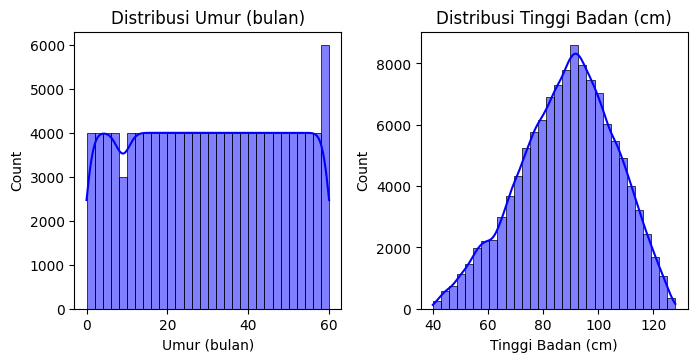

In [43]:
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

<ipython-input-44-ac8604cc4b6f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
<ipython-input-44-ac8604cc4b6f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


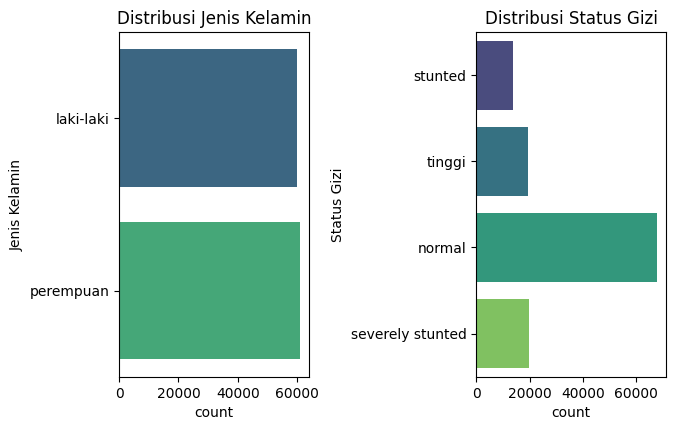

In [44]:
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

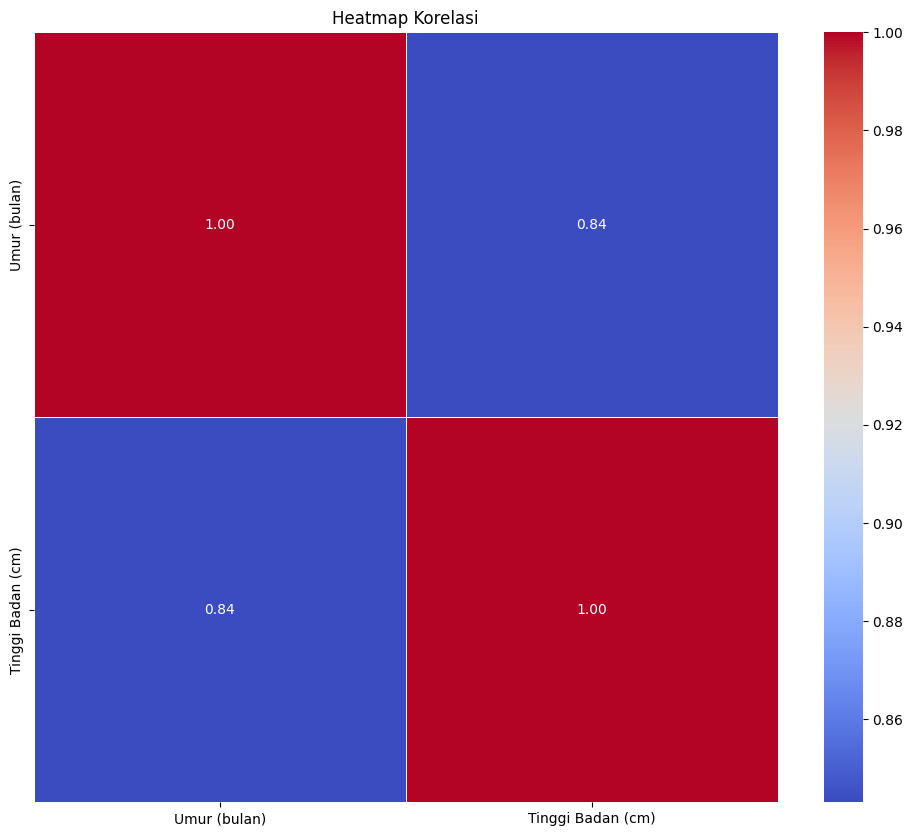

In [45]:
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

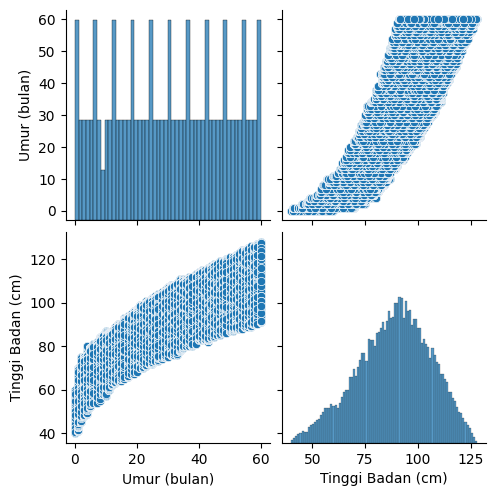

In [46]:
sns.pairplot(num_features)
plt.show()

<ipython-input-47-5d34fa407a9b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status Gizi', data=df, palette='viridis')


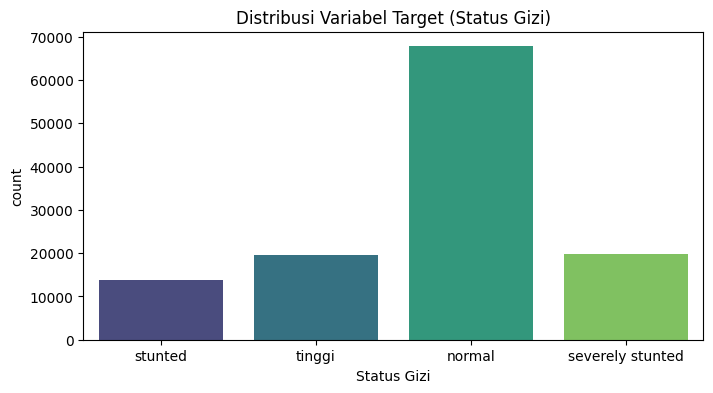

In [47]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Status Gizi', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Status Gizi)')
plt.show()

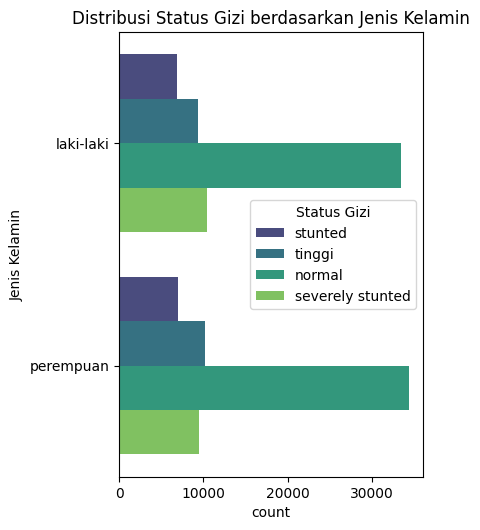

In [48]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(cat_features.columns, 1):
    if column != 'Status Gizi':
        plt.subplot(2, 4, i)
        sns.countplot(y=column, hue='Status Gizi', data=df, palette='viridis')
        plt.title(f'Distribusi Status Gizi berdasarkan {column}')

plt.tight_layout()
plt.show()

# **Data Preparation**

## **Label Encoder**

In [49]:
label_encoder = LabelEncoder()

categorical_columns = ['Jenis Kelamin']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,stunted
1,0,0,56.705203,tinggi
2,0,0,46.863358,normal
3,0,0,47.508026,normal
4,0,0,42.743494,severely stunted


## **Data Splitting**

In [50]:
scaler = MinMaxScaler()

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

X = df.drop(columns=['Status Gizi'])
y = df['Status Gizi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(96799, 3), y_train=(96799,)
Test set shape: X_test=(24200, 3), y_test=(24200,)


## **Training Model**



In [51]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print("Model telah dilatih")

Model telah dilatih


## **Evaluasi Random Forest**

---- Random Forest Classifier ----
Confusion Matrix:
[[13380     0     1     1]
 [    0  4129     1     0]
 [    2     4  2784     0]
 [   11     0     0  3887]]
Accuracy: 0.9992
Precision (macro avg): 0.9993
Recall (macro avg): 0.9987
F1-Score (macro avg): 0.9990


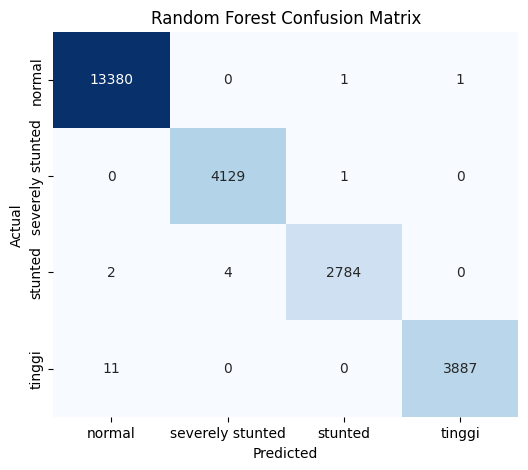

In [52]:
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("---- Random Forest Classifier ----")
print("Confusion Matrix:")
print(cm_rf)

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"F1-Score (macro avg): {f1:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()